In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
X, y = datasets.load_breast_cancer()["data"], datasets.load_breast_cancer()["target"]

In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
input_n_samples, input_n_features = X.shape[0], X.shape[1]
output_n_samples= y.shape[0]

In [7]:
f"There are total {input_n_samples} samples in our input data with each having {input_n_features} features and for each input we also have an output which are total {output_n_samples}"

'There are total 569 samples in our input data with each having 30 features and for each input we also have an output which are total 569'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [13]:
class LogisticRegression(nn.Module):
    def __init__(self, number_input_featrues):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(number_input_featrues, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [14]:
model = LogisticRegression(input_n_features)

In [15]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [16]:
epochs = 100

In [17]:
for epoch in range(1, epochs + 1):
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch == 1) or (epoch % 10 == 0):
        print(f"Epoch # {epoch}")
        print(f"Loss: {loss:.3f}")
        weights, bias = model.parameters()
        print(f"Weights: {weights[0]}")
        print(f"bias: {bias[0]:.3f}")
        print()

Epoch # 1
Loss: 0.859
Weights: tensor([ 0.1776,  0.0595,  0.0318, -0.0788,  0.1554,  0.1393, -0.1459,  0.0612,
         0.0169,  0.0432,  0.1658,  0.0638,  0.0383, -0.1777,  0.0614, -0.1340,
         0.0622, -0.0072,  0.0832, -0.0736, -0.0471, -0.0859, -0.1348,  0.0221,
        -0.0585, -0.0170,  0.0845,  0.1282, -0.0298,  0.1789],
       grad_fn=<SelectBackward0>)
bias: -0.149

Epoch # 10
Loss: 0.662
Weights: tensor([ 0.1481,  0.0425,  0.0015, -0.1072,  0.1345,  0.1094, -0.1777,  0.0262,
        -0.0011,  0.0388,  0.1413,  0.0627,  0.0143, -0.2001,  0.0618, -0.1483,
         0.0516, -0.0261,  0.0807, -0.0792, -0.0787, -0.1049, -0.1669, -0.0075,
        -0.0807, -0.0452,  0.0544,  0.0926, -0.0503,  0.1612],
       grad_fn=<SelectBackward0>)
bias: -0.133

Epoch # 20
Loss: 0.535
Weights: tensor([ 0.1231,  0.0274, -0.0241, -0.1311,  0.1164,  0.0848, -0.2039, -0.0033,
        -0.0163,  0.0359,  0.1208,  0.0618, -0.0055, -0.2185,  0.0624, -0.1586,
         0.0444, -0.0410,  0.0788, -0.0821,

In [18]:
with torch.no_grad():
    predictions = model(X_test).round()

In [19]:
accuracy = (predictions.eq(y_test).sum() / y_test.shape[0]) * 100

In [20]:
print(f"The accuracy of our model on test dataset is {accuracy:.3f}%")

The accuracy of our model on test dataset is 92.105%


In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91        47
         1.0       0.97      0.90      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



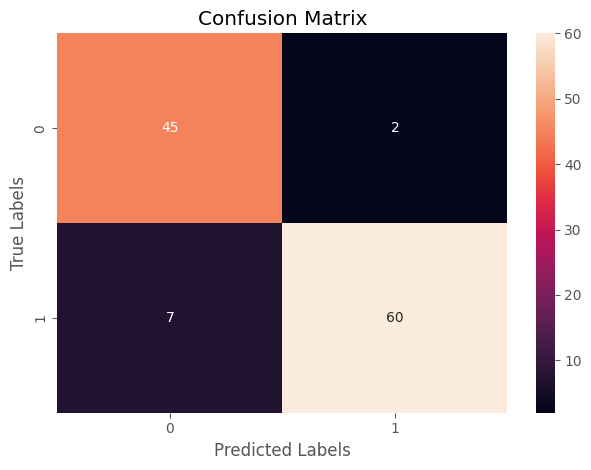

In [22]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()